### Load the Boston dataset and examine its target (label) distribution.


In [1]:
import numpy as np
import pylab as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

In [2]:
%matplotlib inline

In [17]:
################################
### ADD EXTRA LIBRARIES HERE ###
################################
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn import grid_search

In [4]:
def load_data():
    """Load the Boston dataset."""
    boston = datasets.load_boston()
    return boston

In [5]:
def explore_city_data(city_data):
    """Calculate the Boston housing statistics."""

    # Get the labels and features from the housing data
    housing_prices = city_data.target
    housing_features = city_data.data

    ###################################
    ### Step 1. YOUR CODE GOES HERE ###
    ###################################

    # Uncomment this line for further details about the data set.    
    # print city_data['DESCR']
    
    # Please calculate the following values using the Numpy library
    # Size of data (number of houses)?
    num_houses = len(city_data.data)
    print "Size of data (number of houses)? " + str(num_houses)
    
    # Number of features?
    num_features = len(city_data.data[0])
    print "Number of features? " + str(num_features)
    
    # Minimum price?
    min_price = np.min(housing_prices)
    print "Minimum price (in $1000's)? " + str(min_price)
    
    # Maximum price?
    max_price = np.max(housing_prices)
    print "Maximum price (in $1000's)? " + str(max_price)
    
    # Calculate mean price?
    mean_price = np.mean(housing_prices)
    print "Calculate mean price (in $1000's)? " + str(mean_price)
    
    # Calculate median price?
    median_price = np.median(housing_prices)
    print "Calculate median price (in $1000's)? " + str(median_price)
    
    # Calculate standard deviation?
    std_price = np.std(housing_prices)
    print "Calculate standard deviation (in $1000's)? " + str(std_price)
    
    
    # I added a plot to help illsutrate these diescriptive statistics.    
    pl.figure()
    pl.title('Distribution of Boston House Prices')
    pl.hist(city_data.target, bins=50., color='c')
    pl.xlabel('Price ($1000\'s)')
    pl.ylabel('Number of Records')
    median_label = 'Median of %2.2f' % median_price
    pl.axvline(median_price, color='r', linestyle='solid', linewidth=2, label=median_label)
    mean_label = 'Mean of %2.2f' % mean_price
    pl.axvline(mean_price, color='b', linestyle='solid', linewidth=2, label=mean_label)
    pl.legend()
    pl.show()

In [6]:
def split_data(city_data):
    """Randomly shuffle the sample set. Divide it into 70 percent training and 30 percent testing data."""

    # Get the features and labels from the Boston housing data
    X, y = city_data.data, city_data.target

    ###################################
    ### Step 2. YOUR CODE GOES HERE ###
    ###################################
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

    return X_train, y_train, X_test, y_test

In [18]:
def performance_metric(label, prediction):
    """Calculate and return the appropriate error performance metric."""

    ###################################
    ### Step 3. YOUR CODE GOES HERE ###
    ###################################

    # The following page has a table of scoring functions in sklearn:
    # http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
    return mean_squared_error(label, prediction) 

In [88]:
def learning_curve(depth, X_train, y_train, X_test, y_test, show_plot=True):
    """Calculate the performance of the model after a set of training data."""

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.round(np.linspace(1, len(X_train), 50))
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))
    
    if show_plot:
        print "Decision Tree with Max Depth: " + str(depth)

    for i, s in enumerate(sizes):

        # Create and fit the decision tree regressor model
        regressor = DecisionTreeRegressor(max_depth=depth)
        regressor.fit(X_train[:s], y_train[:s])

        # Find the performance on the training and testing set
        train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))


    # Plot learning curve graph
    if show_plot:
        learning_curve_graph(depth, sizes, train_err, test_err)
    return [sizes, train_err, test_err]

In [100]:
def learning_curve_graph(depth, sizes, train_err, test_err):
    """Plot training and test error as a function of the training size."""

    pl.figure()
    title = "Decision Trees with Max Depth " + str(depth) + ": \n Performance vs Training Size"
    pl.title(title)
    pl.plot(sizes, test_err, lw=2, label = 'test error')
    pl.plot(sizes, train_err, lw=2, label = 'training error')
    pl.legend()
    pl.xlabel('Training Size')
    pl.ylabel('Error')
    pl.xlim(sizes[0], sizes[-1])
    pl.show()

In [82]:
def model_complexity(X_train, y_train, X_test, y_test, show_plot=True):
    """Calculate the performance of the model as model complexity increases."""

    if show_plot:
        print "Model Complexity: "

    # We will vary the depth of decision trees from 2 to 25
    max_depth = np.arange(1, 25)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth=d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    if show_plot:
        model_complexity_graph(max_depth, train_err, test_err)
    return [max_depth, train_err, test_err]

In [101]:
def model_complexity_graph(max_depth, train_err, test_err):
    """Plot training and test error as a function of the depth of the decision tree learn."""

    pl.figure()
    pl.title('Decision Trees: Performance vs Max Depth')
    pl.plot(max_depth, test_err, lw=2, label = 'test error')
    pl.plot(max_depth, train_err, lw=2, label = 'training error')
    pl.legend()
    pl.xlabel('Max Depth')
    pl.ylabel('Error')
    pl.xlim(max_depth[0], max_depth[-1])
    pl.show()

In [12]:
def fit_predict_model(city_data):
    """Find and tune the optimal model. Make a prediction on housing data."""

    # Get the features and labels from the Boston housing data
    X, y = city_data.data, city_data.target

    # Setup a Decision Tree Regressor
    regressor = DecisionTreeRegressor()

    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    ###################################
    ### Step 4. YOUR CODE GOES HERE ###
    ###################################

    # 1. Find an appropriate performance metric. This should be the same as the
    # one used in your performance_metric procedure above:
    # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html
    scorer = make_scorer(mean_squared_error, greater_is_better=False)
    
    # 2. We will use grid search to fine tune the Decision Tree Regressor and
    # obtain the parameters that generate the best training performance. Set up
    # the grid search object here.
    # http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV
    reg = grid_search.GridSearchCV(regressor, parameters, scoring=scorer, cv=10)
                             

    # Fit the learner to the training data to obtain the best parameter set
    reg = reg.fit(X, y)
    print "Final Model: "
    best_model = reg.best_estimator_
    print best_model
    
    print "All scores: " + str(reg.grid_scores_)
    
    # I have added additional print statements to help undertand output of the Grid Search.     
    optim_max_depth = reg.best_params_['max_depth']
    score = reg.best_score_
    print "The optimal max_depth parameter found by Grid Search: " + str(optim_max_depth)
    print "The score given by Grid Search for the optimal model: " + str(score)
    
    # Use the model to predict the output of a particular sample
    x = [11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]
    y = best_model.predict(x)
    print "House: " + str(x)
    print "Prediction: " + str(y)
    
    # By returning this tuple of max_depth, model score and predictin, it is possible to analyse a sample of results.    
    return (optim_max_depth, score, y[0])


In [92]:
## In the case of the documentation page for GridSearchCV, it might be the case that the example is just a 
# demonstration of syntax for use of the function, rather than a statement about 
def main():
    """Analyze the Boston housing data. Evaluate and validate the
    performanance of a Decision Tree regressor on the housing data.
    Fine tune the model to make prediction on unseen data."""

    # Load data
    city_data = load_data()

    # Explore the data
    explore_city_data(city_data)

    # Training/Test dataset split
    X_train, y_train, X_test, y_test = split_data(city_data)

    # Learning Curve Graphs
    max_depths = [1,2,3,4,5,6,7,8,9,10]
    for max_depth in max_depths:
        learning_curve(max_depth, X_train, y_train, X_test, y_test)

    # Model Complexity Graph
    model_complexity(X_train, y_train, X_test, y_test)

    # Tune and predict Model
    fit_predict_model(city_data)
    
    # If sampling is desired to allow for further analysis of the results, uncomment the following code.    
#     results = []
#     for i in xrange(1000):
#         results.append(fit_predict_model(city_data))

#     return results
    

Size of data (number of houses)? 506
Number of features? 13
Minimum price (in $1000's)? 5.0
Maximum price (in $1000's)? 50.0
Calculate mean price (in $1000's)? 22.5328063241
Calculate median price (in $1000's)? 21.2
Calculate standard deviation (in $1000's)? 9.18801154528


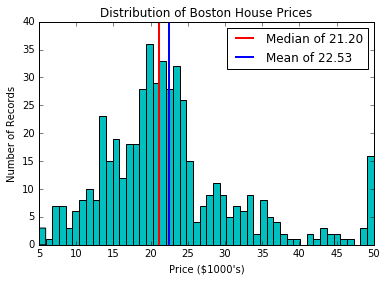

Decision Tree with Max Depth: 1


/Users/ejm/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ejm/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


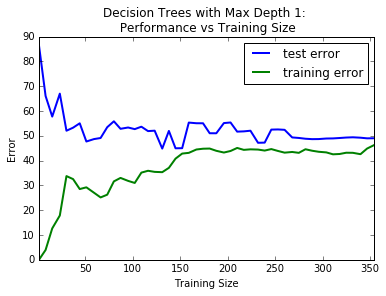

Decision Tree with Max Depth: 2


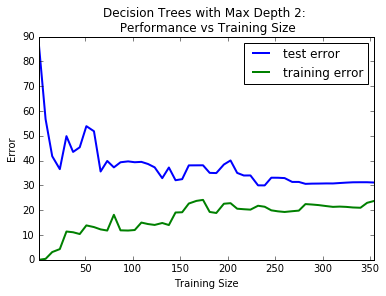

Decision Tree with Max Depth: 3


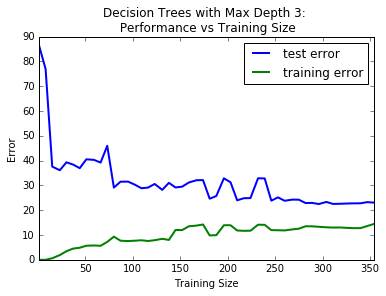

Decision Tree with Max Depth: 4


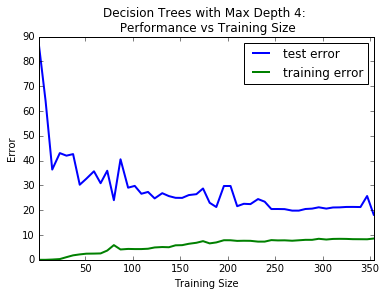

Decision Tree with Max Depth: 5


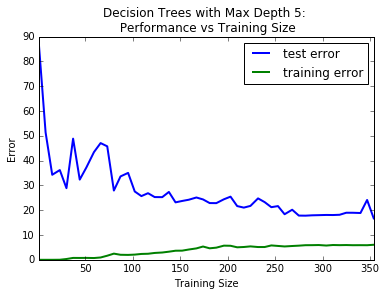

Decision Tree with Max Depth: 6


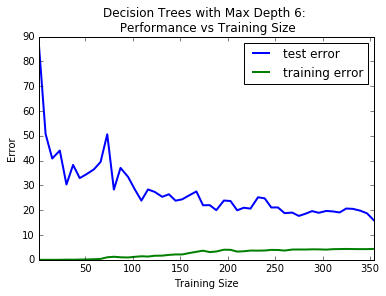

Decision Tree with Max Depth: 7


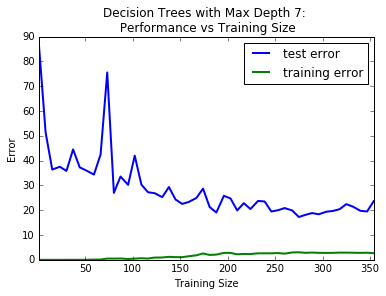

Decision Tree with Max Depth: 8


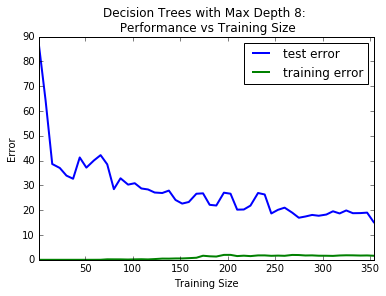

Decision Tree with Max Depth: 9


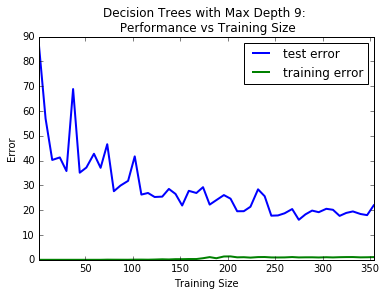

Decision Tree with Max Depth: 10


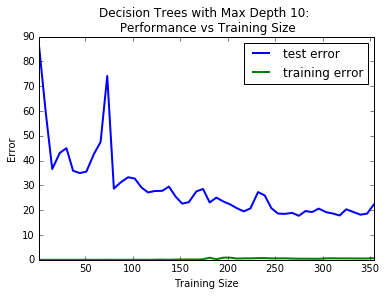

Model Complexity: 


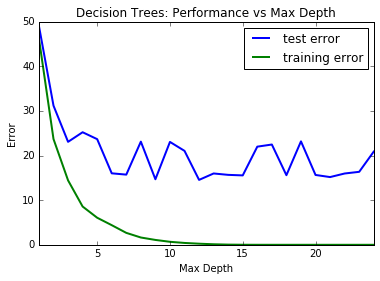

Final Model: 
DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
All scores: [mean: -70.40126, std: 47.80094, params: {'max_depth': 1}, mean: -40.12898, std: 30.76690, params: {'max_depth': 2}, mean: -38.63890, std: 29.30666, params: {'max_depth': 3}, mean: -34.65719, std: 29.24006, params: {'max_depth': 4}, mean: -35.20864, std: 32.13365, params: {'max_depth': 5}, mean: -35.77900, std: 30.88518, params: {'max_depth': 6}, mean: -36.03874, std: 27.41543, params: {'max_depth': 7}, mean: -38.06560, std: 30.84167, params: {'max_depth': 8}, mean: -36.39838, std: 31.05404, params: {'max_depth': 9}, mean: -34.30969, std: 25.21211, params: {'max_depth': 10}]
The optimal max_depth parameter found by Grid Search: 10
The score given by Grid Search for the optimal model: -34.309690205
House: [11.95, 0.0,

/Users/ejm/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [108]:
main()

In [ ]:
results = main()

In [ ]:
from collections import Counter

In [ ]:
results_except_scores = [(result[0], result[2]) for result in results]
rounded_results = [tuple(np.around(result, decimals=4)) for result in results_except_scores]

print Counter(rounded_results).keys()
print Counter(rounded_results).values()

In [ ]:
for max_depth in [4.,5.,6.,7.,8.,9.,10.]:
    print np.around(np.mean([result[1] for result in results if result[0] == max_depth]), decimals=4)

In [ ]:
np.corrcoef([40, 229, 222, 139, 164, 108, 98], [-34.7937, -32.6347, -32.7927, -32.8964, -32.8084, -33.0129, -33.2868])

In [ ]:
np.sort([139, 108, 40, 164, 98, 222, 229])

In [ ]:
np.sort([0.448,
0.4236,
0.437,
0.4293,
0.4147,
0.4114,
0.4096])

In [ ]:
for i in xrange(13):
    print np.mean([result[i] for result in city_data.data])

In [ ]:
# Mean absolute error
[(8.0, 18.816700000000001), (7.0, 19.997499999999999), (9.0, 19.327300000000001), (10.0, 20.719999999999999), (6.0, 20.765999999999998)]
[168, 824, 2, 4, 2]

-2.492
-2.4238
-2.416
-2.4337
-2.4098

In [ ]:
# Median absolute error
[(8.0, 18.816700000000001), (7.0, 19.997499999999999), (9.0, 19.327300000000001), (10.0, 20.719999999999999)]
[163, 829, 2, 6]

-2.425
-2.4133
-2.4522
-2.4286

In [14]:
# Mean squared error
[(7.0, 19.997499999999999), (9.0, 19.327300000000001), (4.0, 21.6297), (8.0, 18.816700000000001), (10.0, 20.719999999999999), (6.0, 20.765999999999998), (5.0, 20.9678)]
[139, 108, 40, 164, 98, 222, 229]

-34.7937
-32.6347
-32.7927
-32.8964
-32.8084
-33.0129
-33.2868

-33.2868

In [87]:
def explore_100_iterations():
    city_data = load_data()
    max_depths = [1,2,3,4,5,6,7,8,9,10]
    one_hundred_sets_of_learning_curve_data = []
    one_hundred_sets_of_model_complexity_data = []
    
    print "This will take some time. Now might be a good time to take a break and make a nice hot cup of tea."
    
    for max_depth in max_depths:
        one_hundred_sets_of_learning_curve_data.append([])
        for i in xrange(100):
            X_train, y_train, X_test, y_test = split_data(city_data)
            
            learning_curve_data = learning_curve(max_depth, X_train, y_train, X_test, y_test, False)
            one_hundred_sets_of_learning_curve_data[max_depth - 1].append(learning_curve_data)
            
            model_complexity_data = model_complexity(X_train, y_train, X_test, y_test, False)
            one_hundred_sets_of_model_complexity_data.append(model_complexity_data)
            
    draw_averaged_learning_curves(max_depths, one_hundred_sets_of_learning_curve_data)
    draw_averaged__model_complexity(one_hundred_sets_of_model_complexity_data)

In [72]:
def draw_averaged_learning_curves(max_depths, sets_of_learning_curve_data):
    for max_depth in max_depths:
        learning_curve_data = sets_of_learning_curve_data[max_depth - 1]
        sizes = learning_curve_data[0][0]
        pl.figure()
        title = "Decision Trees with Max Depth " + str(max_depth) + ": \n Performance vs Training Size for 100 iterations"
        pl.title(title)
        all_test_errors = []
        all_training_errors = []
        for learning_curve in learning_curve_data:
            training_error = learning_curve[1]
            test_error = learning_curve[2]
            all_training_errors.append(training_error)
            all_test_errors.append(test_error)
            pl.plot(sizes, training_error, color='g', alpha= 0.03, lw=1)
            pl.plot(sizes, test_error, color='b', alpha= 0.03, lw=1)

        pl.plot(sizes, np.mean(all_training_errors, axis=0), color='g', lw=2, label = 'mean training error')
        pl.plot(sizes, np.mean(all_test_errors, axis=0), color='b', lw=2, label = 'mean test error')
        pl.legend()
        pl.xlabel('Training Size')
        pl.ylabel('Error')
        pl.ylim(0,200)
        pl.xlim(0,sizes[-1])
        pl.show()

In [75]:
def draw_averaged__model_complexity(sets_of_model_complexity_data):
    pl.figure()
    title = "Decision Trees: \n Performance vs Max Depth for 100 iterations"
    pl.title(title)
    all_test_errors = []
    all_training_errors = []
    max_depth = sets_of_model_complexity_data[0][0]
    for model_complexity_curve in sets_of_model_complexity_data:
        training_error = model_complexity_curve[1]
        test_error = model_complexity_curve[2]
        all_training_errors.append(training_error)
        all_test_errors.append(test_error)
        pl.plot(max_depth, training_error, color='g', alpha= 0.01, lw=1)
        pl.plot(max_depth, test_error, color='b', alpha= 0.01, lw=1)
    
    mean_training_errors = np.mean(all_test_errors, axis=0)
    mean_test_errors = np.mean(all_test_errors, axis=0)
    
    pl.plot(max_depth, mean_training_errors, color='g', lw=2, label = 'mean training error')
    pl.plot(max_depth, mean_test_errors, color='b', lw=2, label = 'mean test error')
    pl.legend()
    pl.xlabel('Max Depth')
    pl.ylabel('Error')
    pl.xlim(max_depth[0], max_depth[-1])
    pl.show()
    
    # Print the max_depth value where the mean test error is minimised.
    minimum_mean_test_error = np.min(mean_test_errors)
    optimal_max_depth = max_depth[mean_test_errors.tolist().index(minimum_mean_test_error)]
    print "Optimal Maximum Depth: " + str(optimal_max_depth)

/Users/ejm/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ejm/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


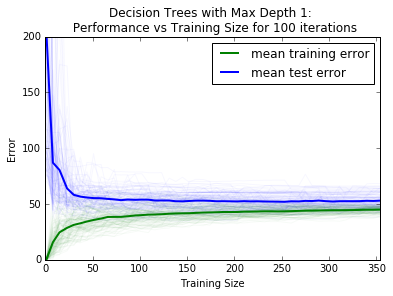

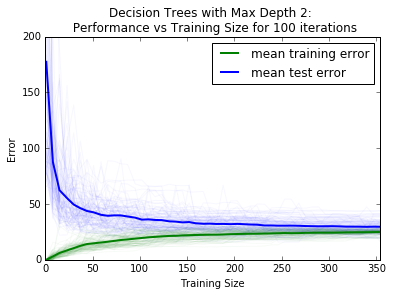

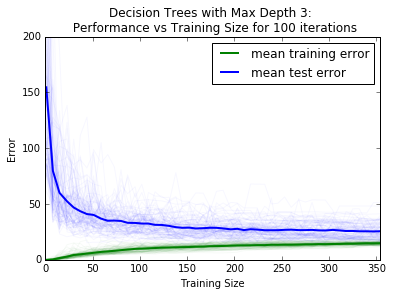

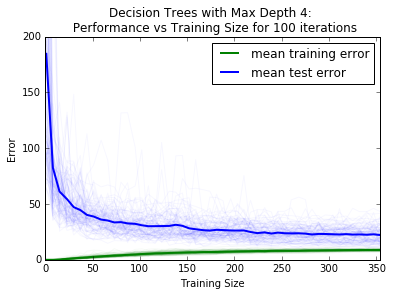

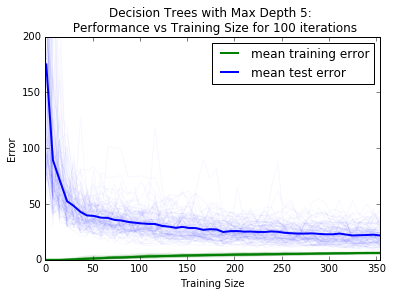

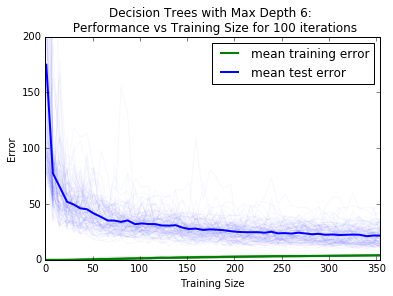

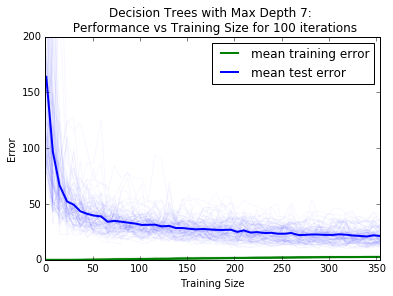

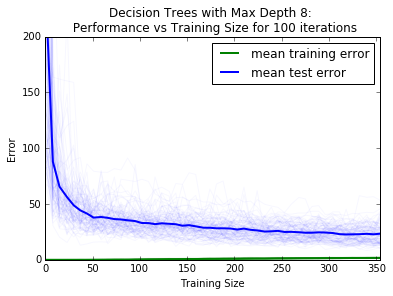

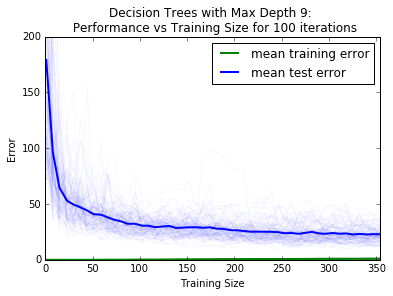

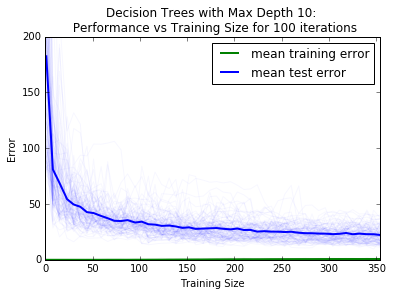

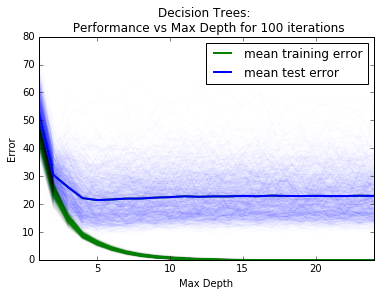

Optimal Maximum Depth: 5


In [86]:
explore_100_iterations()

In [121]:
def plot_each_feature_vs_target(city_data):
    feature_names = city_data['feature_names'] 
    data = city_data.data
    targets = city_data.target
    
    for i in xrange(len(feature_names)):
        feature_data = [ datum[i] for datum in data]
        feature_name = feature_names[i]
        pl.figure()
        pl.title("Boston House Data: " + feature_name + " vs MEDV")
        pl.scatter(feature_data, city_data.target, alpha=0.2)
        pl.xlabel(feature_name)
        pl.ylabel('MEDV ($1000)')
        pl.show()
        

In [109]:
city_data = load_data()

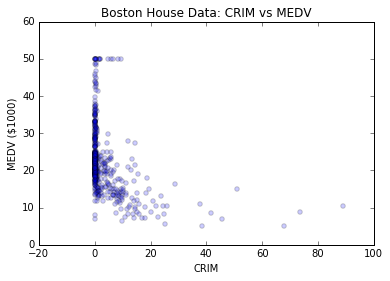

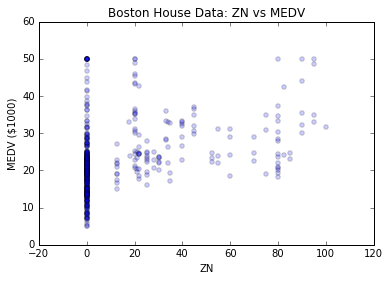

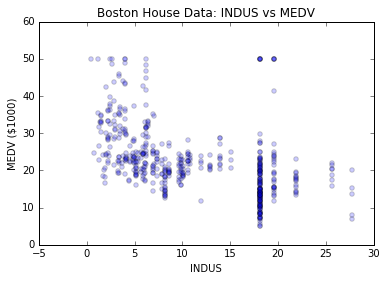

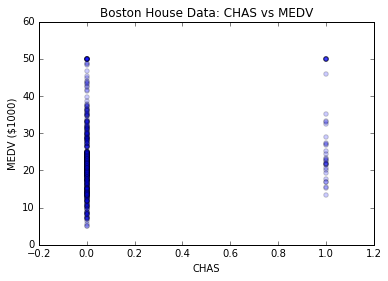

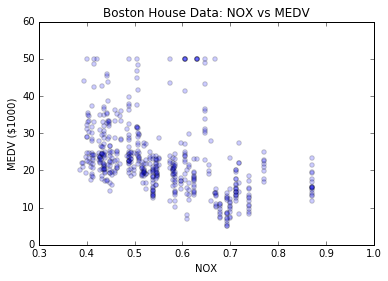

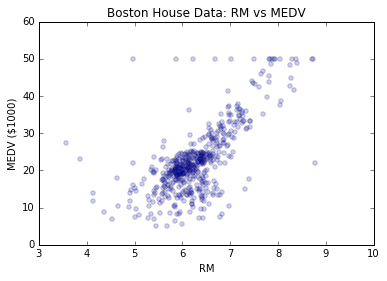

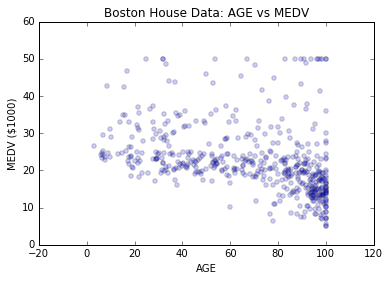

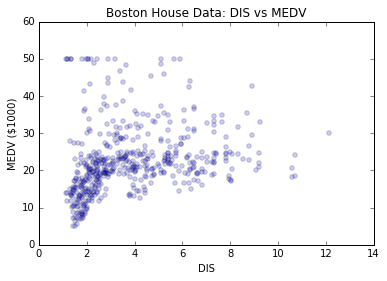

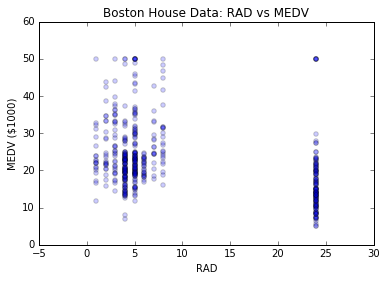

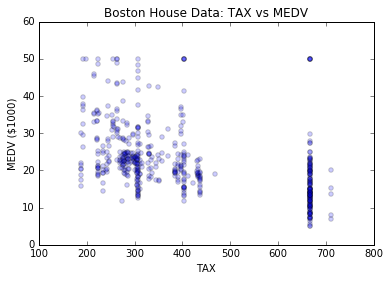

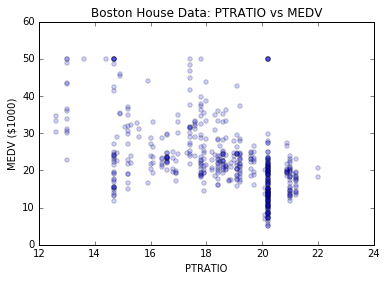

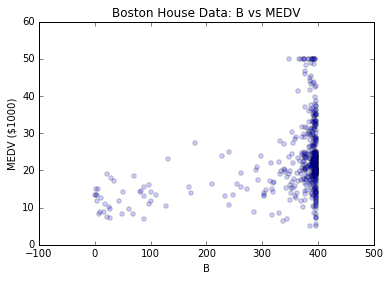

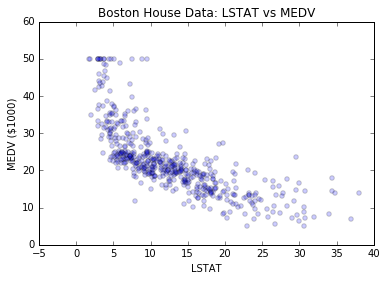

In [123]:
plot_each_feature_vs_target(city_data)